Pol Monfort Mateo 1641028

Ingrid Sánchz Ruiz 1631092

GitHub: https://github.com/1641028/Kaggle-video-game-sales-2019.git

# KAGGLE: VIDEO GAME SALES 2019

Aquest projecte és centrat en els videojocs venuts al 2019. Hem escollit el següent dataset:

https://www.kaggle.com/ashaheedq/video-games-sales-2019. 

Hem escollit el dataset degut a que ha sigut el que més interessant hem trobat i també perque ens agraden bastant els videojocs. Per la pràctica utilitzarem l'arxiu vgsales-12-4-2019.csv. Aquest conjunt conté diferents videojocs amb la plataforma en la que van sortir, l'any publicat, l'estudi que el va desenvolupar... La intenció de la pràctica serà predir les ventes properes totals de cada joc.

### 1. EDA (EXPLORATORY DATA ANALYSIS)

Importem les llibreries i posteriorment fem la lectura de l'arxiu vgsales-12-4-2019.csv i el llistem per veure el seu contingut de manera superficial.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("vgsales-12-4-2019.csv")
data

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


Llistem els atributs:

In [2]:
#Atributs de la base de dades
at = data.shape[1]
print("Atributs de la BD : " , at)
print(data.columns)

Atributs de la BD :  23
Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')


Tenim 23 atributs a la base de dades:

-Rank: Es el ranking de ventes totals

-Name: Nom del joc

-basename: Identificador únic del joc

-Genre: Genere del joc

-ESRB_Rating: Clasificació ESRB del joc

-Platform: Plataforma on es va llençar el joc (PS4,PC,Xbox...)

-Publisher: Editor del joc

-Developer: Desenvolupadors del joc

-VGChartz_Score: Puntuació otorgada per VGChartz

-Critic_Score: Puntuació de la crítica del joc desde 10

-User_Score: Puntuació que donen els usuaris desde 10

-Total_Shipped: Total de copies enviades del joc

-Global_Sales: Ventes totals a nivell mundial(en millions)

-NA_Sales: Ventes a América del Nord (en millions)

-PAL_Sales: Ventes a Europa (en millions)

-JP_Sales: Ventes al Japó (en millions)

-Other_Sales: Ventes a la resta del món (en millions)

-Year: Any on es va llençar el joc

-Last_Update: Última data d'actualització dels jocs

-url: URL al detall del joc a VGChartz

-status: Indica si l'estat del joc és actiu o no ho és

-Vgchartzscore: Duplicat de VGChartz_Score

-img_url: URL de l'imatge de portada del videojoc

Ara procedim a veure el tipus d'atribut que són els 23 atributs del dataset.

In [3]:
#Tipus d'atributs
types=data.dtypes
print(types)

Rank                int64
Name               object
basename           object
Genre              object
ESRB_Rating        object
Platform           object
Publisher          object
Developer          object
VGChartz_Score    float64
Critic_Score      float64
User_Score        float64
Total_Shipped     float64
Global_Sales      float64
NA_Sales          float64
PAL_Sales         float64
JP_Sales          float64
Other_Sales       float64
Year              float64
Last_Update        object
url                object
status              int64
Vgchartzscore     float64
img_url            object
dtype: object


Després de veure el tipus de cada atribut, podem veure que tenim 10 atributs categòrics i 13 atributs numèrics.

In [4]:
are_nans= data.isna().sum()
print(are_nans)

Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       32169
Platform              0
Publisher             0
Developer            17
VGChartz_Score    55792
Critic_Score      49256
User_Score        55457
Total_Shipped     53965
Global_Sales      36377
NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270
Year                979
Last_Update       46606
url                   0
status                0
Vgchartzscore     54993
img_url               0
dtype: int64


Desrpés de realitzar una primera revisió de NaNs, podem veure que n'hi han columnes amb una gran quantitat de NaNs, que posteriorment a l'apartat de preprocessing tractarem per realitzar un millor treball amb les dades.

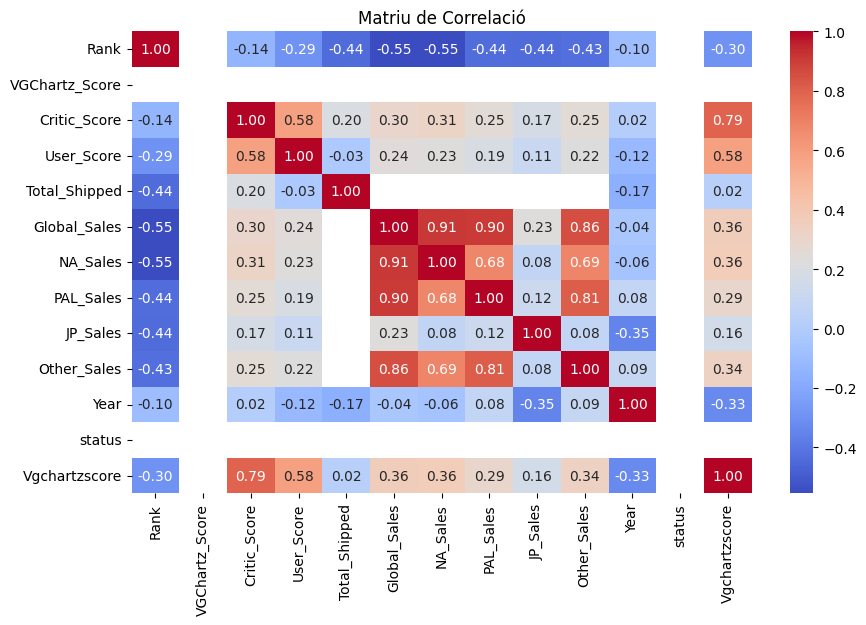

In [5]:
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriu de Correlació")
plt.show()

Desrpés de realitzar la matriu de correlació, on el color vermell representa una correlació positiva forta i el blau representa una correlació negativa forta. Observant la matriu, podem destacar la correlació negativa entre Rank i Global_Sales i NA_Sales, que les dues parelles tenen un valor de -0.55, indicant una correlació negativa moderada. Això ens indica que a mesura que Rank augmenta, les Global_Sales incrementen també. En el cas contrari el mateix, a mesura que Global_Sales augmenta, Rank augmenta, cosa que té bastant sentit.

### 2. Preprocessing (normalitzation, outlier removal, feature selection..) 

### Neteja de NaNs
Primer de tot netejarem el data set de NaNs donat a la gran quantitat que n'hi ha, ja que començar per exemple amb la normalització quan la majoria d'atributs s'hauran d'eliminar no tindria molt sentit.

Haurem d'eliminar la major part dels atributs donat a la seva gran quantitat de NaNs (més d'un 80% en la majoria de casos). 

Eliminarem els següents atributs: 
**VGChartz_Score**    55792
**Critic_Score**      49256
**User_Score**        55457
**Total_Shipped**     53965

Però abans d'eliminar **aprofitarem Total_Shipped** per aconseguir omplir NaNs de Global_Sales ja que és un atribut important, i aquests dos atributs tenen una bona relació. Total_Shipped indica la quantitat de enviaments que s'han fet, per tant, pot ser un valor aproximat de les ventes totals que s'han arribat a fer.

In [6]:

filtered_df = data[data['Global_Sales'].isna() & data['Total_Shipped'].notna()]
filtered_df = filtered_df[['Rank', 'Global_Sales', 'Total_Shipped']]

filtered_df

,Rank,Global_Sales,Total_Shipped
0,1,NaN,82.86
1,2,NaN,40.24
2,3,NaN,37.14
3,4,NaN,36.60
4,5,NaN,33.09
...,...,...,...
13340,13341,NaN,0.08
13610,13611,NaN,0.08
13931,13932,NaN,0.07
16760,16761,NaN,0.03


In [7]:
global_nan= data['Global_Sales'].isna().sum()
print("NaN global abans:" , global_nan)

# per totes les files amb global sales a nan li carreguem les dades de total shipped
data.loc[data['Global_Sales'].isna() & data['Total_Shipped'].notna(), 'Global_Sales'] = data['Total_Shipped']


data[['Rank', 'Global_Sales', 'Total_Shipped']]


global_nan= data['Global_Sales'].isna().sum()
print("NaN global després:" , global_nan)

data[['Rank', 'Global_Sales', 'Total_Shipped']].head(100)

NaN global abans: 36377
NaN global després: 34550


,Rank,Global_Sales,Total_Shipped
0,1,82.86,82.86
1,2,40.24,40.24
2,3,37.14,37.14
3,4,36.60,36.60
4,5,33.09,33.09
...,...,...,...
95,96,9.37,9.37
96,97,9.32,9.32
97,98,9.32,NaN
98,99,9.31,9.31


També eliminarem els atributs NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270 

Encara que en un primer moment hem pensat omplir global sales amb la suma d'aquests atributs, no funcionaria donat que no hi ha cap fila on aquests atributs tots estiguin complerts però Global_Sales no, per tant, els eliminarem directament

In [8]:
# agafem les files on Global_Sales sigui NaN però les altres Sales no
filtered_data = data[data['Global_Sales'].isna() & 
                     data[['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']].notna().all(axis=1)]


filtered_data[['Rank', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']]


,Rank,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales


Per tant eliminarem finalment aquests atributs:
**ESRB_Rating, VGChartz_Score, Critic_Score, User_Score, Total_Shipped, NA_Sales, PAL_Sales, JP_Sales, Other_Sales, Last_Update i Vgchartzscore**

In [9]:
# Seleccionem les columnes a eliminar
columns_to_remove = ['VGChartz_Score', 'Critic_Score', 'User_Score', 'Total_Shipped', 
                     'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Last_Update', 'Vgchartzscore', 'ESRB_Rating']

data = data.drop(columns=columns_to_remove)
data


,Rank,Name,basename,Genre,Platform,Publisher,Developer,Global_Sales,Year,url,status,img_url
0,1,Wii Sports,wii-sports,Sports,Wii,Nintendo,Nintendo EAD,82.86,2006.0,http://www.vgchartz.com/game/2667/wii-sports/?...,1,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NES,Nintendo,Nintendo EAD,40.24,1985.0,http://www.vgchartz.com/game/6455/super-mario-...,1,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,Wii,Nintendo,Nintendo EAD,37.14,2008.0,http://www.vgchartz.com/game/6968/mario-kart-w...,1,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,PC,PUBG Corporation,PUBG Corporation,36.60,2017.0,http://www.vgchartz.com/game/215988/playerunkn...,1,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,Wii,Nintendo,Nintendo EAD,33.09,2009.0,http://www.vgchartz.com/game/24656/wii-sports-...,1,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,PC,505 Games,Lab Zero Games,NaN,2019.0,http://www.vgchartz.com/game/224682/indivisibl...,1,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,PC,Mooneye Studios,Mooneye Studios,NaN,2019.0,http://www.vgchartz.com/games/game.php?id=2246...,1,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,PS4,Mooneye Studios,Mooneye Studios,NaN,2019.0,http://www.vgchartz.com/game/224690/lost-ember...,1,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,XOne,Mooneye Studios,Mooneye Studios,NaN,2019.0,http://www.vgchartz.com/game/224688/lost-ember...,1,/games/boxart/full_6799693AmericaFrontccc.jpg


Ara ens queden tres atributs amb NaN: Global_Sales (amb més del 50% de NaNs), Year (amb menys de l'1%) i Developer (amb només 17 NaNs).

Primer tractarem Year i Developer, ja que son pocs NaNs a tractar.

Donat que el data set es un ranking, hem decidit no utilitzar el mètode d'eliminar files, per tant, omplirem aquests NaNs.

**Year** -> utilitzarem la mitja de Year

**Developer** -> al ser de tipus categòric l'omplim amb "Unknown"

In [10]:
# Mostrem les dades on Developer o Year son NaN
nan_developer_or_year = data[data['Developer'].isna() | data['Year'].isna()]
display(nan_developer_or_year[['Developer', 'Year']])

# Omplim Developer amb "Unknown"
data['Developer'] = data['Developer'].fillna('Unknown')

# Omplim Year amb la mitja
data['Year'] = data['Year'].fillna(int(data['Year'].mean()))

# Mostrem el data després d'omplir els Nan
data.loc[nan_developer_or_year.index, ['Developer', 'Year']]


,Developer,Year
10839,NaN,2008.0
12704,NaN,2008.0
15224,Cyanide Studio,NaN
15653,Slitherine Software,NaN
15791,Unknown,NaN
...,...,...
55766,Baroque Decay,NaN
55767,Baroque Decay,NaN
55769,Snowhydra Games,NaN
55774,Padaone Games,NaN


,Developer,Year
10839,Unknown,2008.0
12704,Unknown,2008.0
15224,Cyanide Studio,2005.0
15653,Slitherine Software,2005.0
15791,Unknown,2005.0
...,...,...
55766,Baroque Decay,2005.0
55767,Baroque Decay,2005.0
55769,Snowhydra Games,2005.0
55774,Padaone Games,2005.0


Ara terminarem d'oblir Global Sales. Per la seva quantitat de NaN podriem eliminar l'atribut, però per la seva rellevancia en el data set el deixarem, ja que el ranking està fet segon el nombre global de ventes.

Donat que el valor de Global_Sales és decreixent (la primera fila és el valor màxim i l'última el mínim i va en ordre decreixent donat que és un ranking per ventes) utilitzarem **l'interpolació lineal**, ja que ens permet possar un valor entremig dels dos valors que tingui al costat.

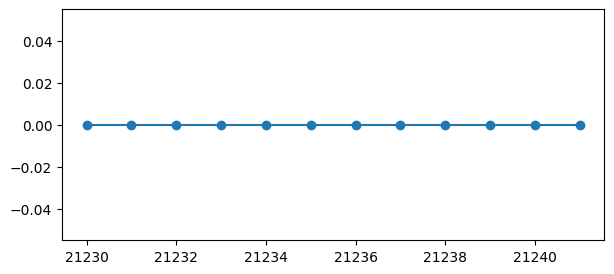

In [11]:
plt.figure(figsize=(7, 3)) 
data_1000 = data.iloc[21230:21280]
plt.plot(data_1000.index, data_1000['Global_Sales'], marker='o')


In [12]:
data['isNan'] = data['Global_Sales'].isna()

display(data[['Global_Sales', 'isNan']].iloc[21230:21280])

# Interpolació
data['Global_Sales'] = data['Global_Sales'].interpolate(method='linear')

data[['Global_Sales', 'isNan']].iloc[21230:21280]


,Global_Sales,isNan
21230,0.0,False
21231,0.0,False
21232,0.0,False
21233,0.0,False
21234,0.0,False
21235,0.0,False
21236,0.0,False
21237,0.0,False
21238,0.0,False
21239,0.0,False


,Global_Sales,isNan
21230,0.0,False
21231,0.0,False
21232,0.0,False
21233,0.0,False
21234,0.0,False
21235,0.0,False
21236,0.0,False
21237,0.0,False
21238,0.0,False
21239,0.0,False


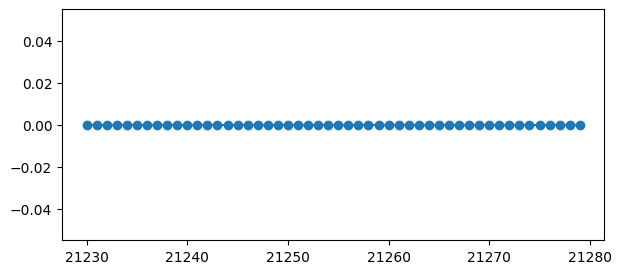

In [13]:
plt.figure(figsize=(7, 3)) 
data_1000 = data.iloc[21230:21280]
plt.plot(data_1000.index, data_1000['Global_Sales'], marker='o')


In [14]:
are_nans= data.isna().sum()
print(are_nans)

Rank            0
Name            0
basename        0
Genre           0
Platform        0
Publisher       0
Developer       0
Global_Sales    0
Year            0
url             0
status          0
img_url         0
isNan           0
dtype: int64


Com podem veure, ja no tenim cap NaN en el nostre dataset

### Encoding i normalització

In [15]:
data

,Rank,Name,basename,Genre,Platform,Publisher,Developer,Global_Sales,Year,url,status,img_url,isNan
0,1,Wii Sports,wii-sports,Sports,Wii,Nintendo,Nintendo EAD,82.86,2006.0,http://www.vgchartz.com/game/2667/wii-sports/?...,1,/games/boxart/full_2258645AmericaFrontccc.jpg,False
1,2,Super Mario Bros.,super-mario-bros,Platform,NES,Nintendo,Nintendo EAD,40.24,1985.0,http://www.vgchartz.com/game/6455/super-mario-...,1,/games/boxart/8972270ccc.jpg,False
2,3,Mario Kart Wii,mario-kart-wii,Racing,Wii,Nintendo,Nintendo EAD,37.14,2008.0,http://www.vgchartz.com/game/6968/mario-kart-w...,1,/games/boxart/full_8932480AmericaFrontccc.jpg,False
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,PC,PUBG Corporation,PUBG Corporation,36.60,2017.0,http://www.vgchartz.com/game/215988/playerunkn...,1,/games/boxart/full_8052843AmericaFrontccc.jpg,False
4,5,Wii Sports Resort,wii-sports-resort,Sports,Wii,Nintendo,Nintendo EAD,33.09,2009.0,http://www.vgchartz.com/game/24656/wii-sports-...,1,/games/boxart/full_7295041AmericaFrontccc.jpg,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,PC,505 Games,Lab Zero Games,0.00,2019.0,http://www.vgchartz.com/game/224682/indivisibl...,1,/games/boxart/full_6339426AmericaFrontccc.jpg,True
55788,55789,Lost Ember,lost-amber,Adventure,PC,Mooneye Studios,Mooneye Studios,0.00,2019.0,http://www.vgchartz.com/games/game.php?id=2246...,1,/games/boxart/full_8893129AmericaFrontccc.jpg,True
55789,55790,Lost Ember,lost-amber,Adventure,PS4,Mooneye Studios,Mooneye Studios,0.00,2019.0,http://www.vgchartz.com/game/224690/lost-ember...,1,/games/boxart/full_6514293AmericaFrontccc.jpg,True
55790,55791,Lost Ember,lost-amber,Adventure,XOne,Mooneye Studios,Mooneye Studios,0.00,2019.0,http://www.vgchartz.com/game/224688/lost-ember...,1,/games/boxart/full_6799693AmericaFrontccc.jpg,True


Ara que no tenim NaN hem de procedir a seleccionar els atributs que ens resultaran utils per al nostre model, aquells que poden arribar a tenir relació amb el tarjet i eliminar els que no.

En aquest cas considerem no essencials:

**Basename:** ja té name

**URL:** no serviria per entrenar al model

**Status:** no s'especifica que és en la web

**img_url:** no serviria per entrenar al model

In [16]:
# Seleccionem les columnes a eliminar
columns_to_remove = ['isNan', 'basename', 'url', 'status', 'img_url']

data = data.drop(columns=columns_to_remove)
data


,Rank,Name,Genre,Platform,Publisher,Developer,Global_Sales,Year
0,1,Wii Sports,Sports,Wii,Nintendo,Nintendo EAD,82.86,2006.0
1,2,Super Mario Bros.,Platform,NES,Nintendo,Nintendo EAD,40.24,1985.0
2,3,Mario Kart Wii,Racing,Wii,Nintendo,Nintendo EAD,37.14,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,PC,PUBG Corporation,PUBG Corporation,36.60,2017.0
4,5,Wii Sports Resort,Sports,Wii,Nintendo,Nintendo EAD,33.09,2009.0
...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,Role-Playing,PC,505 Games,Lab Zero Games,0.00,2019.0
55788,55789,Lost Ember,Adventure,PC,Mooneye Studios,Mooneye Studios,0.00,2019.0
55789,55790,Lost Ember,Adventure,PS4,Mooneye Studios,Mooneye Studios,0.00,2019.0
55790,55791,Lost Ember,Adventure,XOne,Mooneye Studios,Mooneye Studios,0.00,2019.0


Ara hem de decidir que fer, si fer encoding o eliminar l'atribut donat a la impossibilitat de fer encoding.

In [17]:
# Veiem els valors unics que tenim per saber quan podem fer un encoding i quin
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Atributo: {column}")
    print(f"Valores únicos ({len(unique_values)}): {unique_values[:10]}")  
    print("-" * 50)


Atributo: Rank
Valores únicos (55792): [ 1  2  3  4  5  6  7  8  9 10]
--------------------------------------------------
Atributo: Name
Valores únicos (37102): ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii'
 "PlayerUnknown's Battlegrounds" 'Wii Sports Resort'
 'Pokemon Red / Green / Blue Version' 'New Super Mario Bros.' 'Tetris'
 'New Super Mario Bros. Wii' 'Minecraft']
--------------------------------------------------
Atributo: Genre
Valores únicos (20): ['Sports' 'Platform' 'Racing' 'Shooter' 'Role-Playing' 'Puzzle' 'Misc'
 'Party' 'Simulation' 'Action']
--------------------------------------------------
Atributo: Platform
Valores únicos (74): ['Wii' 'NES' 'PC' 'GB' 'DS' 'X360' 'SNES' 'PS3' 'PS4' '3DS']
--------------------------------------------------
Atributo: Publisher
Valores únicos (3069): ['Nintendo' 'PUBG Corporation' 'Mojang' 'Microsoft Game Studios'
 'Rockstar Games' 'Unknown' 'Activision' 'VU Games' 'Sega'
 'Sony Computer Entertainment']
-----------------------------

Donat la quantitat massiva de categories que tenim en Developer, Publisher i Name les hem d'eliminar, ja que fer un encoding en aquestes dades categoriques no tindria cap sentit.

In [18]:
# Seleccionem les columnes a eliminar
columns_to_remove = ['Developer', 'Publisher', 'Name']

data = data.drop(columns=columns_to_remove)
data

,Rank,Genre,Platform,Global_Sales,Year
0,1,Sports,Wii,82.86,2006.0
1,2,Platform,NES,40.24,1985.0
2,3,Racing,Wii,37.14,2008.0
3,4,Shooter,PC,36.60,2017.0
4,5,Sports,Wii,33.09,2009.0
...,...,...,...,...,...
55787,55788,Role-Playing,PC,0.00,2019.0
55788,55789,Adventure,PC,0.00,2019.0
55789,55790,Adventure,PS4,0.00,2019.0
55790,55791,Adventure,XOne,0.00,2019.0


Per tant, ens queda Genre i Platform per fer l'encoding, ja que tenen un número decent per generar categories.

Finalment, hem decidit fer **binary encoding a Platform**, ja que té 74 categories i això serien masses columnes a processar i una alta complexitat computacional si utilitzasem One-Hot, en canvi si el fem amb binary només son 7 columnes, el que és millor quan hi ha tantes dades a processar.

Per altre banda, utilitzarem **One-Hot encoding** en Genre, ja que encara que siguin bastantes categories (20) ja son molt més assumibles computacionalment que 74.

In [19]:
from category_encoders import BinaryEncoder

binary_encoder = BinaryEncoder(cols=['Platform'])

# Fem binary i one hot encoding
data = binary_encoder.fit_transform(data)
data = pd.get_dummies(data, columns=['Genre'], prefix='Genre')

data = data.astype(int)
data

,Rank,Platform_0,Platform_1,Platform_2,Platform_3,Platform_4,Platform_5,Platform_6,Global_Sales,Year,...,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Visual Novel
0,1,0,0,0,0,0,0,1,82,2006,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,1,0,40,1985,...,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,1,37,2008,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,1,36,2017,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,0,1,33,2009,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,0,0,0,0,0,1,1,0,2019,...,0,0,0,1,0,0,0,0,0,0
55788,55789,0,0,0,0,0,1,1,0,2019,...,0,0,0,0,0,0,0,0,0,0
55789,55790,0,0,0,1,0,0,1,0,2019,...,0,0,0,0,0,0,0,0,0,0
55790,55791,0,0,1,0,0,0,1,0,2019,...,0,0,0,0,0,0,0,0,0,0


L'últim a processar abans de passar a les mètriques son els atributs numèrics (Year i Global_Sales), que els normalitzarem amb la tècnica MinMax.

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Generem el escalador
scaler = MinMaxScaler()

# Normalitzem
data[['Year', 'Global_Sales']] = scaler.fit_transform(data[['Year', 'Global_Sales']])

data


,Rank,Platform_0,Platform_1,Platform_2,Platform_3,Platform_4,Platform_5,Platform_6,Global_Sales,Year,...,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Genre_Visual Novel
0,1,0,0,0,0,0,0,1,1.000000,0.72,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,1,0,0.487805,0.30,...,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,1,0.451220,0.76,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,1,0.439024,0.94,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,0,1,0.402439,0.78,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,0,0,0,0,0,1,1,0.000000,0.98,...,0,0,0,1,0,0,0,0,0,0
55788,55789,0,0,0,0,0,1,1,0.000000,0.98,...,0,0,0,0,0,0,0,0,0,0
55789,55790,0,0,0,1,0,0,1,0.000000,0.98,...,0,0,0,0,0,0,0,0,0,0
55790,55791,0,0,1,0,0,0,1,0.000000,0.98,...,0,0,0,0,0,0,0,0,0,0


### 3. Metric Selection && Model Selection

Com a mètriques hem utilitzat les següents mètriques, ja que les considerem útils pel problema de regressió:

-MSE (Error Quadràtic Mitjà): Mesura la mitjana dels quadrats de les diferències entre els valors reals i les prediccions i a més, penalitza els errors més grans.

-MAE (Error Absolut Mitjà): Representa la mitjana de les diferències absolutes entre els valors reals i les prediccions i és menys sensible als errors grans.

-RMSE (Arrel de l'Error Quadràtic Mitjà): És la MSE però amb la seva arrel quadrada, donant l'error en la mateixa escala que les dades originals.

-R^2 (Coeficient de Determinació): Indica la proporció de la variabilitat dels valors reals que el model és capaç d'explicar. Trobariem un valor ideal en un valor proper a 1.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'Global_Sales' 
attributes = [k for k in data.keys() if k != target]

X = data[attributes]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name}:')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R^2: {r2}')
    print('-' * 40)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression:
MSE: 8.807885008173444e-05
MAE: 0.0028609134174035758
RMSE: 0.009385033302111103
R^2: 0.041840681346916875
----------------------------------------


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest:
MSE: 1.2384967771786324e-06
MAE: 2.030334819477731e-05
RMSE: 0.0011128777009081603
R^2: 0.9865271035319567
----------------------------------------
Support Vector Regressor:
MSE: 0.004843231169024265
MAE: 0.062496096598006146
RMSE: 0.06959332704379254
R^2: -51.68673549535836
----------------------------------------


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Com a models hem probat amb tres diferents: Linear Regression, Random Forest i Suport Vector Regressor. Evaluarem cada model en funció de les mètriques que hem escollit abans. Dels resultats obtinguts de cada model basats en les mètriques podem treure diverses conclusions. El model de regressió lineal va treure uns resultats molt limitats. Sobretot, per la part del coeficient de determinació, que va ser molt baix en comparació als altres models. Això indica que el model no aconsegueix explicar la variabilitat de Global_Sales en funció a les característiques que s'han observat. Per altra banda, tenim el model Random Forest que ha sigut el millor dels 3, tenint errors molt baixos i un coeficient de determinació molt proper a 1, cosa que significa que es capaç d'explicar la majoria de variabilitat de Global_Sales. Aquest model és especialment ideal per aquest conjunt de dades. Per últim, tenim el model SVR que ha tingut uns resultats deficients. Els errors han sigut significativament més elevats que als altres models, i amb un coeficient de determinació negatiu, cosa que el descarta completament.

En definitiva, dels models analitzats el Random Forest és el més adecuat per predir les ventes.

### 4. Hiperparàmetres

Com hem pogut observar en l'apartat anterior, el millor model es **Random Forest**.

Per tant, el que farem a continuació és buscar els millos hiperparàmetres per aconseguir optimitzar el nostre model en base a les mètriques que hem estat utilitzant: MSE, MAE, RMSE i R2.

Primer tornem a mostrar el model amb el Random Forest per tenir-ho en compte.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'Global_Sales'  
attributes = [k for k in data.keys() if k != target]  

X = data[attributes]
y = data[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entrenament
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediccions
y_pred = model.predict(X_test)

# Mètriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Resultats amb Random Forest:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


Métricas del modelo Random Forest:
MSE: 1.2384967771786324e-06
MAE: 2.030334819477731e-05
RMSE: 0.0011128777009081603
R^2: 0.9865271035319567


El **MSE és baix**, pel que demostra que els resultats de les prediccions son bastant acurats a la realitat, el que indica un bon rendiment. Encara que aquesta mètrica no és la més correcte ja que augmenta a mesura que les variables augmenten.

El **MAE també es ínfim**, mostrant que les prediccions erroneas es desvien molt poc de la realitat, sent això molt positiu.

El **RMSE és petit**, el que reforça la idea de que funciona bastant bé, ja que aquest penalitza més els errors greus i no ha donat pas elevat, per tant, no hi han errors molt grans.

Y el **R2 és molt alt**, això indica que el nostre model pot explicar la variança que tenen els resultats, permetent així un millor anàlisi de les dades.

Hem decidit que per aconseguir els millors hiperparàmetres farem el **Randomized Search Cross Validation** ja que ens permetrà buscar més combinacions en un menor temps computacional que el Grid Search, i donat a la gran quantitat de dades que té el nostre model hem pensat que seria la opció més óptima.

A més a més creiem que al buscar hiperparàmetres de manera aleatoria, ajuadarà a no caure tampoc en combinacions que no donen bons resultats, donant pas a combinacions que no se'ns ocurriria però que son més òptimes.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint
import numpy as np

# Definim el rang dels nostres hiperparàmetres ja que es random dins d'aquest rang
param_dist = {
    'n_estimators': randint(100, 300),       
    'max_depth': [None, 10, 20, 30, 40],     
    'min_samples_split': randint(2, 20),       
    'min_samples_leaf': randint(1, 10),         
    'bootstrap': [True, False]                  
}

# Inicialitzem la nostra busquedad
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  
    scoring='r2',  # Busquem millorar el R2
    cv=5,  
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Busquem els millors parametres
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Millors paràmetres trobats:", best_params)

# Prediccions
y_pred = best_model.predict(X_test)

# Metriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMillor model:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Millors paràmetres trobats: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 275}

Millor model:
MSE: 4.2677107331053835e-07
MAE: 1.44402323788719e-05
RMSE: 0.0006532771795421438
R²: 0.9953574021408702


Els resultats amb els nous hiperparàmetres han millorat de manera general.

Els erorrs son menys frequents (MSE), a més a més son molt més petits, es a dir, de la predicció a la realitat varia encara menys (MAE), i els errors greus apareixen amb bastant menys frequencia que abans (RMSE).

També aconseguim millorar el R2, portant-lo quasi al valor màxim, estant a 0.005 d'aquest valor (1).

Per tant, si abans el nostre model té un rendiment molt òptim, amb aquests ajustaments tenim un **model encara més òptim**, que fa prediccions més acurades i amb molt menys errors.

### CONCLUSIONS

Després d'haver realitzat l'ànalisi de dades i el seu respectiu tractament, podem treure diferents conclusions després de la realització d'aquest treball. Primerament, cal remarcar que s'ha tractat d'un dataset bastant gran, en comparació als altres datasets vists a l'assignatura d'Apc, com pot ser el del Titanic o els tractats als problemes de l'assignatura. A més la complexitat de les dades ha sigut desafiant, degut a l'alt número de dades categòriques, cosa que ha dificultat tot el tractament de les dades. Altre aspecte rellevant ha sigut el tractament de NANS, ja que el dataset presentava moltes columnes amb NANS com hem pogut veure al punt 1 i després tractar al punt 2. Per la part de la mètrica i el model s'ha tingut bastant clar els passos a seguir degut als problemes i anterior pràctica realitzada i a més, l'evaluació a les mètriques era força clara. I finalment, per a la part dels hiperparàmetres s'ha complicat a causa de l'elevat temps de còmput.

En conclusió, em arribat a un model amb un bon rendiment donat amb bones mètriques i a més a més, hem pogut aplicar els coneixements de preparació per tractar amb data sets complexes, possant en pràctica tots els processos realitzats fins ara.